<a href="https://colab.research.google.com/github/OtabekMamajonov/qiziqish/blob/main/Classifying_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [4]:
files = get_image_files(path/'images')
len(files)

7390

In [5]:
files[0].name

'Birman_149.jpg'

In [6]:
pat = r'^(.*)_\d+.jpg'

In [7]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

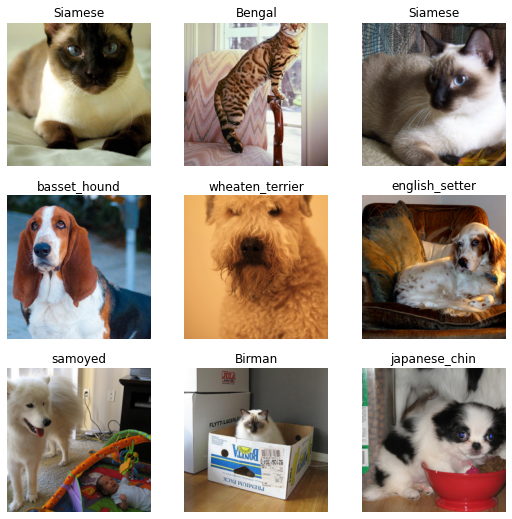

In [8]:
dls.show_batch()

In [9]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

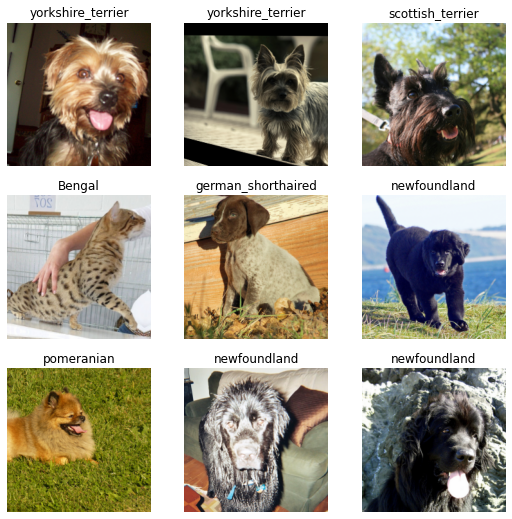

In [10]:
dls.show_batch()

In [11]:
model = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

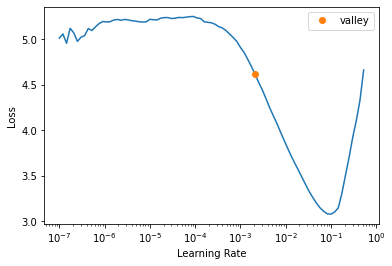

In [14]:
model.lr_find()

In [16]:
model.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.264860,0.342986,0.110961,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.506812,0.370353,0.114344,01:09
1,0.315086,0.279107,0.084574,01:08


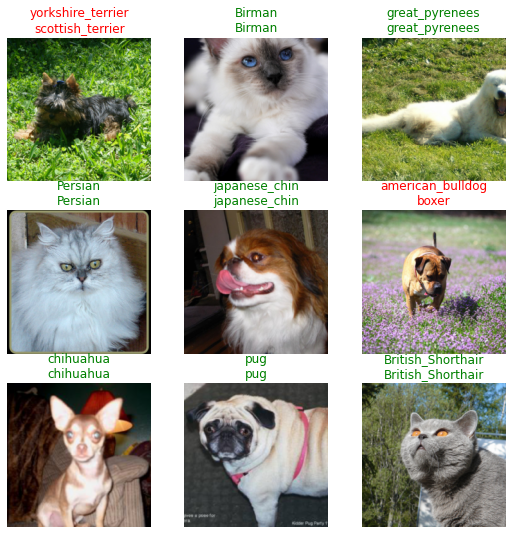

In [18]:
model.show_results()

In [19]:
interp = Interpretation.from_learner(model)

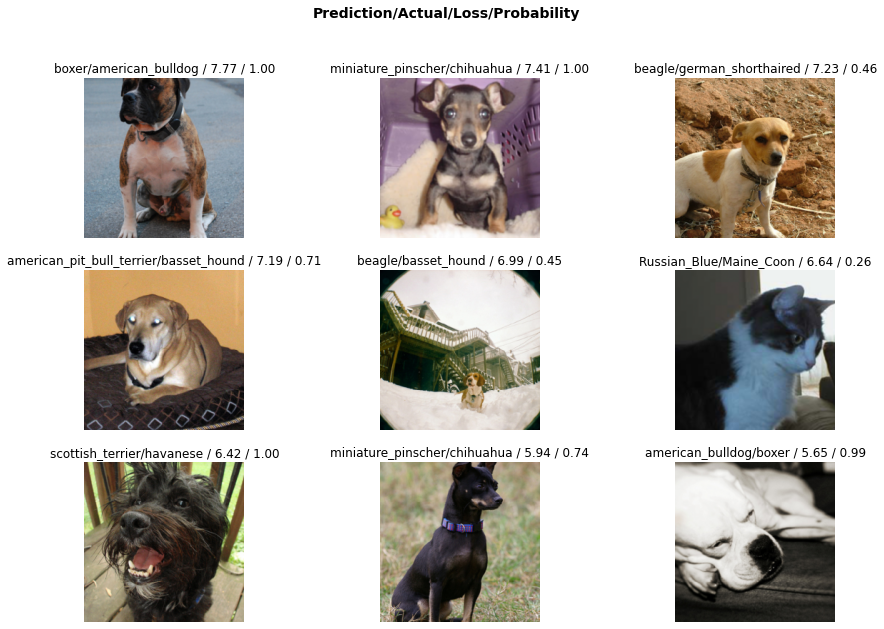

In [20]:
interp.plot_top_losses(9, figsize=(15,10))